In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read energy data
df = pd.read_csv("..\\Data\\energy_data.csv")
weather_df = pd.read_csv("..\\Data\\weather_daily_darksky.csv")

In [2]:
df.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,blockid
0,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,block_0
1,1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,block_0
2,2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,block_0
3,3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,block_0
4,4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,block_0


In [3]:
df = df.dropna()

In [4]:
df.loc[df['energy_count'] < 48, 'energy_sum'] = (48 - df['energy_count']) * df['energy_median'] + df['energy_sum']

In [5]:
weather_df.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [6]:
holiday_df = pd.read_csv("..\\Data\\uk_bank_holidays.csv")
holiday_df['day'] = holiday_df['Bank holidays']
holiday_df['day'] = pd.to_datetime(holiday_df['day'],format='%Y-%m-%d').dt.date
holiday_df = holiday_df.set_index('day')
holiday_df = holiday_df.dropna()
holiday_df['isHoliday'] = [True]* len(holiday_df)
holiday_df = holiday_df.drop(['Bank holidays', 'Type'], axis=1)
holiday_df.head()

,isHoliday
day,
2012-12-26,True
2012-12-25,True
2012-08-27,True
2012-05-06,True
2012-04-06,True


In [7]:
housecount = df.groupby('day')[['LCLid']].count()
housecount

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41
2011-11-28,55
2011-11-29,63
2011-11-30,76
2011-12-01,92


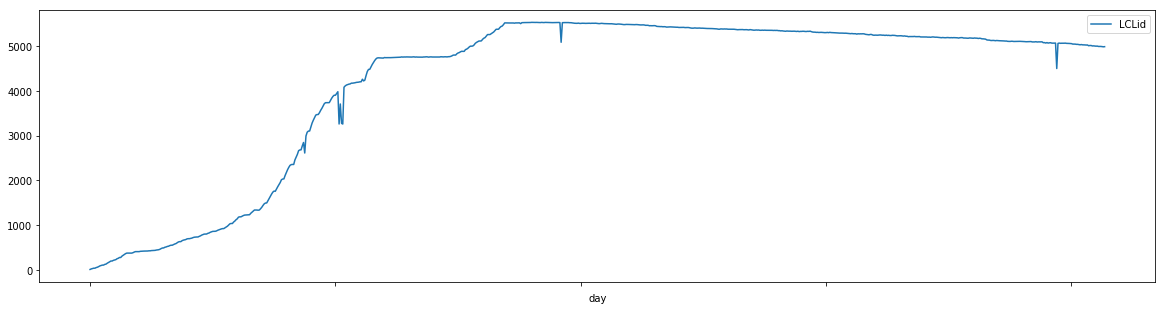

In [92]:
housecount.plot(figsize=(20,5))

In [9]:
# calculate the sum of total energy per day.
total_energy = df.groupby("day")[["energy_sum", "energy_median"]].sum()
total_energy

,energy_sum,energy_median
day,,
2011-11-23,159.349000,2.966000
2011-11-24,271.566000,4.839500
2011-11-25,340.373000,5.689000
2011-11-26,475.057000,8.334500
2011-11-27,444.883001,7.423500
2011-11-28,569.707000,9.663000
2011-11-29,626.526000,10.153000
2011-11-30,731.281000,11.991000
2011-12-01,959.142001,16.046500


In [10]:
energy_df = total_energy.merge(housecount, on=["day"])
energy_df = energy_df.reset_index()
energy_df

,day,energy_sum,energy_median,LCLid
0,2011-11-23,159.349000,2.966000,13
1,2011-11-24,271.566000,4.839500,25
2,2011-11-25,340.373000,5.689000,32
3,2011-11-26,475.057000,8.334500,41
4,2011-11-27,444.883001,7.423500,41
5,2011-11-28,569.707000,9.663000,55
6,2011-11-29,626.526000,10.153000,63
7,2011-11-30,731.281000,11.991000,76
8,2011-12-01,959.142001,16.046500,92
9,2011-12-02,1064.487001,17.409500,100


In [11]:
energy_df['energy_sum'] = energy_df['energy_sum']/energy_df['LCLid']
energy_df['energy_median'] = energy_df['energy_median']/energy_df['LCLid']
energy_df.drop(energy_df.tail(1).index, inplace = True)

In [12]:
energy_df['day'] = pd.to_datetime(energy_df['day'],format='%Y-%m-%d').dt.date

In [13]:
energy_df = energy_df.set_index('day')

In [14]:
energy_hol_df = energy_df.merge(holiday_df, how='left', on='day')
energy_hol_df.head()

,energy_sum,energy_median,LCLid,isHoliday
day,,,,
2011-11-23,12.257615,0.228154,13,NaN
2011-11-24,10.862640,0.193580,25,NaN
2011-11-25,10.636656,0.177781,32,NaN
2011-11-26,11.586756,0.203280,41,NaN
2011-11-27,10.850805,0.181061,41,NaN


In [15]:
energy_hol_df = energy_hol_df.fillna(value={'isHoliday': False})

In [16]:
weather_df.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [17]:
weather_df['day'] = pd.to_datetime(weather_df['time'],format='%Y-%m-%d').dt.date
weather_df = weather_df.drop('time', axis=1)
weather_df = weather_df.set_index('day')

In [18]:
merged_df = energy_hol_df.merge(weather_df, how='inner', on='day')
merged_df_1 = merged_df.drop(['temperatureHigh', 'uvIndex', 'windBearing', 'dewPoint', 'windSpeed', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMax', 'temperatureMin', 'apparentTemperatureMax', 'apparentTemperatureMin', 'temperatureMaxTime', 'temperatureMinTime', 'icon', 'apparentTemperatureMinTime', 'apparentTemperatureHighTime', 'precipType', 'visibility', 'sunsetTime', 'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary', 'temperatureLowTime', 'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase'], axis=1)
merged_df_1.dropna(inplace=True)
merged_df_1.head()

,energy_sum,energy_median,LCLid,isHoliday,cloudCover,pressure,humidity,temperatureLow
day,,,,,,,,
2011-11-23,12.257615,0.228154,13,False,0.36,1027.12,0.93,8.24
2011-11-24,10.862640,0.193580,25,False,0.41,1027.22,0.89,9.71
2011-11-25,10.636656,0.177781,32,False,0.48,1024.47,0.79,7.01
2011-11-26,11.586756,0.203280,41,False,0.44,1025.80,0.81,11.59
2011-11-27,10.850805,0.181061,41,False,0.42,1021.11,0.72,1.31


In [19]:
merged_df_1.head()

,energy_sum,energy_median,LCLid,isHoliday,cloudCover,pressure,humidity,temperatureLow
day,,,,,,,,
2011-11-23,12.257615,0.228154,13,False,0.36,1027.12,0.93,8.24
2011-11-24,10.862640,0.193580,25,False,0.41,1027.22,0.89,9.71
2011-11-25,10.636656,0.177781,32,False,0.48,1024.47,0.79,7.01
2011-11-26,11.586756,0.203280,41,False,0.44,1025.80,0.81,11.59
2011-11-27,10.850805,0.181061,41,False,0.42,1021.11,0.72,1.31


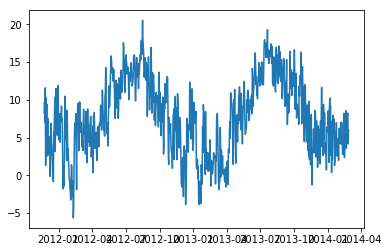

In [20]:
plt.plot(merged_df_1['temperatureLow'])

In [21]:
merged_df1 = merged_df_1.sort_values(by=['day'])
merged_df1

,energy_sum,energy_median,LCLid,isHoliday,cloudCover,pressure,humidity,temperatureLow
day,,,,,,,,
2011-11-23,12.257615,0.228154,13,False,0.36,1027.12,0.93,8.24
2011-11-24,10.862640,0.193580,25,False,0.41,1027.22,0.89,9.71
2011-11-25,10.636656,0.177781,32,False,0.48,1024.47,0.79,7.01
2011-11-26,11.586756,0.203280,41,False,0.44,1025.80,0.81,11.59
2011-11-27,10.850805,0.181061,41,False,0.42,1021.11,0.72,1.31
2011-11-28,10.358309,0.175691,55,False,0.56,1022.80,0.86,10.27
2011-11-29,9.944857,0.161159,63,False,0.60,1009.70,0.82,6.34
2011-11-30,9.622118,0.157776,76,False,0.31,1019.43,0.78,9.44
2011-12-01,10.425457,0.174418,92,False,0.57,1007.12,0.82,2.56


In [22]:
merged_df_varmax = merged_df1.copy()

In [23]:
merged_df_varmax_1 = merged_df_varmax.reset_index()

In [24]:
merged_df_varmax_1['day'] = pd.to_datetime(merged_df_varmax_1['day'], format="%Y-%m-%d")

In [25]:
merged_df_varmax_1['dayofweek'] = merged_df_varmax_1['day'].dt.dayofweek

In [26]:
merged_df_varmax_1['month'] = merged_df_varmax_1['day'].dt.month

In [27]:
merged_df_varmax_1.head()

,day,energy_sum,energy_median,LCLid,isHoliday,cloudCover,pressure,humidity,temperatureLow,dayofweek,month
0,2011-11-23,12.257615,0.228154,13,False,0.36,1027.12,0.93,8.24,2,11
1,2011-11-24,10.862640,0.193580,25,False,0.41,1027.22,0.89,9.71,3,11
2,2011-11-25,10.636656,0.177781,32,False,0.48,1024.47,0.79,7.01,4,11
3,2011-11-26,11.586756,0.203280,41,False,0.44,1025.80,0.81,11.59,5,11
4,2011-11-27,10.850805,0.181061,41,False,0.42,1021.11,0.72,1.31,6,11


In [28]:
merged_df_varmax_1 = merged_df_varmax_1.set_index('day')

In [29]:
merged_df_varmax_1.head()

,energy_sum,energy_median,LCLid,isHoliday,cloudCover,pressure,humidity,temperatureLow,dayofweek,month
day,,,,,,,,,,
2011-11-23,12.257615,0.228154,13,False,0.36,1027.12,0.93,8.24,2,11
2011-11-24,10.862640,0.193580,25,False,0.41,1027.22,0.89,9.71,3,11
2011-11-25,10.636656,0.177781,32,False,0.48,1024.47,0.79,7.01,4,11
2011-11-26,11.586756,0.203280,41,False,0.44,1025.80,0.81,11.59,5,11
2011-11-27,10.850805,0.181061,41,False,0.42,1021.11,0.72,1.31,6,11


Drop some features that are not required.

In [30]:
corr = merged_df_varmax_1.corr("pearson")
corr

,energy_sum,energy_median,LCLid,isHoliday,cloudCover,pressure,humidity,temperatureLow,dayofweek,month
energy_sum,1.000000,0.980953,-0.342305,-0.000064,0.243550,-0.020815,0.378248,-0.793129,0.090654,-0.234597
energy_median,0.980953,1.000000,-0.286425,0.018912,0.255917,-0.063509,0.385751,-0.758701,0.108378,-0.165675
LCLid,-0.342305,-0.286425,1.000000,0.017880,0.022148,-0.227040,-0.023957,0.185738,-0.006416,0.201130
isHoliday,-0.000064,0.018912,0.017880,1.000000,-0.024189,-0.025871,0.003008,-0.010028,-0.068217,0.009353
cloudCover,0.243550,0.255917,0.022148,-0.024189,1.000000,-0.100319,0.479361,-0.106852,-0.035721,-0.106782
pressure,-0.020815,-0.063509,-0.227040,-0.025871,-0.100319,1.000000,-0.250360,0.056642,0.027237,-0.043306
humidity,0.378248,0.385751,-0.023957,0.003008,0.479361,-0.250360,1.000000,-0.168907,-0.037508,0.154985
temperatureLow,-0.793129,-0.758701,0.185738,-0.010028,-0.106852,0.056642,-0.168907,1.000000,-0.030683,0.258269
dayofweek,0.090654,0.108378,-0.006416,-0.068217,-0.035721,0.027237,-0.037508,-0.030683,1.000000,-0.002956
month,-0.234597,-0.165675,0.201130,0.009353,-0.106782,-0.043306,0.154985,0.258269,-0.002956,1.000000


In [31]:
merged_df_varmax_1_updated = merged_df_varmax_1.drop(['LCLid', 'cloudCover', 'pressure'], axis=1)

In [32]:
merged_df_varmax_1_updated.columns

Index(['energy_sum', 'energy_median', 'isHoliday', 'humidity',
       'temperatureLow', 'dayofweek', 'month'],
      dtype='object')

Encoding for categorical features.

In [33]:
merged_df_varmax_1_updated['weekend'] = [False] * len(merged_df_varmax_1_updated)
merged_df_varmax_1_updated.loc[(merged_df_varmax_1_updated['dayofweek'] == 5), 'weekend'] = True
merged_df_varmax_1_updated.loc[(merged_df_varmax_1_updated['dayofweek'] == 6), 'weekend'] = True

In [35]:
merged_df_varmax_1_updated['dayofweek'] = pd.Categorical(merged_df_varmax_1_updated['dayofweek'])
merged_df_varmax_1_updated = pd.concat([merged_df_varmax_1_updated, pd.get_dummies(merged_df_varmax_1_updated['dayofweek'], prefix='day')],axis=1)

merged_df_varmax_1_updated['weekend'] = pd.Categorical(merged_df_varmax_1_updated['weekend'])
merged_df_varmax_1_updated = pd.concat([merged_df_varmax_1_updated, pd.get_dummies(merged_df_varmax_1_updated['weekend'], prefix='weekend')],axis=1)

merged_df_varmax_1_updated['month'] = pd.Categorical(merged_df_varmax_1_updated['month'])
merged_df_varmax_1_updated = pd.concat([merged_df_varmax_1_updated, pd.get_dummies(merged_df_varmax_1_updated['month'], prefix='month')],axis=1)

merged_df_varmax_1_updated['isHoliday'] = pd.Categorical(merged_df_varmax_1_updated['isHoliday'])
merged_df_varmax_1_updated = pd.concat([merged_df_varmax_1_updated, pd.get_dummies(merged_df_varmax_1_updated['isHoliday'], prefix='holiday')],axis=1)

In [36]:
merged_df_varmax_1_updated.head()

,energy_sum,energy_median,isHoliday,humidity,temperatureLow,dayofweek,month,weekend,day_0,day_1,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_False,holiday_True
day,,,,,,,,,,,,,,,,,,,,,
2011-11-23,12.257615,0.228154,False,0.93,8.24,2,11,False,0,0,...,0,0,0,0,0,0,1,0,1,0
2011-11-24,10.862640,0.193580,False,0.89,9.71,3,11,False,0,0,...,0,0,0,0,0,0,1,0,1,0
2011-11-25,10.636656,0.177781,False,0.79,7.01,4,11,False,0,0,...,0,0,0,0,0,0,1,0,1,0
2011-11-26,11.586756,0.203280,False,0.81,11.59,5,11,True,0,0,...,0,0,0,0,0,0,1,0,1,0
2011-11-27,10.850805,0.181061,False,0.72,1.31,6,11,True,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
# merged_df_varmax_final = merged_df_varmax_1_updated.drop(['dayofweek'], axis=1)
merged_df_varmax_final = merged_df_varmax_1_updated.drop(['dayofweek', 'month', 'weekend', 'isHoliday'], axis=1)
merged_df_varmax_final.head()

,energy_sum,energy_median,humidity,temperatureLow,day_0,day_1,day_2,day_3,day_4,day_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_False,holiday_True
day,,,,,,,,,,,,,,,,,,,,,
2011-11-23,12.257615,0.228154,0.93,8.24,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2011-11-24,10.862640,0.193580,0.89,9.71,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2011-11-25,10.636656,0.177781,0.79,7.01,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2011-11-26,11.586756,0.203280,0.81,11.59,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2011-11-27,10.850805,0.181061,0.72,1.31,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
corr = merged_df_varmax_final.corr("pearson")
corr['energy_sum']

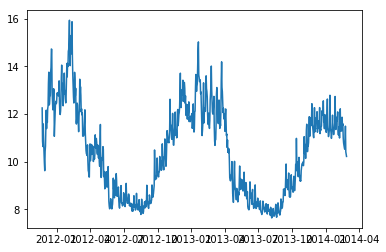

In [39]:
plt.plot(merged_df_varmax_final['energy_sum'])

In [40]:
#split data

merged_df_varmax_train = merged_df_varmax_final[: len(merged_df_varmax_final) - 30]
merged_df_varmax_test = merged_df_varmax_final[len(merged_df_varmax_train):]

In [41]:
merged_df_varmax_train.columns

Index(['energy_sum', 'energy_median', 'humidity', 'temperatureLow', 'day_0',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'weekend_False',
       'weekend_True', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'holiday_False', 'holiday_True'],
      dtype='object')

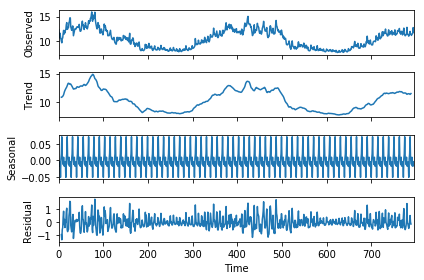

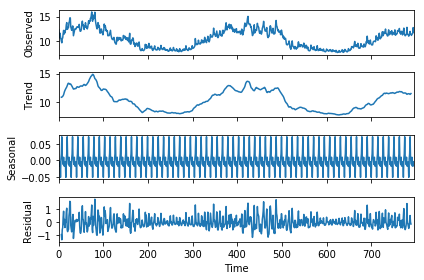

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(merged_df_varmax_train.energy_sum.values, model='additive', freq=12)
result.plot()

In [43]:
endog = merged_df_varmax_train[['energy_sum', 'energy_median']]

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [45]:
X = endog['energy_sum'].values
result = adfuller(X)
print(result)

X = endog['energy_median'].values
result = adfuller(X)
print(result)

(-1.92283938451582, 0.3213941907806729, 21, 774, {'1%': -3.4388268991356936, '5%': -2.8652813916285518, '10%': -2.5687622857867782}, 793.8171825618622)
(-2.0690035812054846, 0.2571596394453982, 15, 780, {'1%': -3.4387614757350087, '5%': -2.865252556432172, '10%': -2.5687469247205788}, -5257.128054290431)


In [46]:
endog_diff = endog.diff().dropna()

In [47]:
endog_diff.head()

,energy_sum,energy_median
day,,
2011-11-24,-1.394975,-0.034574
2011-11-25,-0.225984,-0.015799
2011-11-26,0.950100,0.025499
2011-11-27,-0.735951,-0.022220
2011-11-28,-0.492496,-0.005370


In [48]:
X = endog_diff['energy_sum'].values
result = adfuller(X)
print(result)

X = endog_diff['energy_median'].values
result = adfuller(X)
print(result)

(-6.518646129008732, 1.0556919146368047e-08, 20, 774, {'1%': -3.4388268991356936, '5%': -2.8652813916285518, '10%': -2.5687622857867782}, 795.6210121795662)
(-8.638429941204667, 5.509355000539901e-14, 13, 781, {'1%': -3.438750669890019, '5%': -2.8652477937238703, '10%': -2.56874438754281}, -5246.554852693507)


In [49]:
merged_df_varmax_train.columns

Index(['energy_sum', 'energy_median', 'humidity', 'temperatureLow', 'day_0',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'weekend_False',
       'weekend_True', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'holiday_False', 'holiday_True'],
      dtype='object')

In [53]:
#exog = merged_df_varmax_train[['humidity', 'temperatureLow', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'holiday_0.0', 'holiday_1.0']]
exog = merged_df_varmax_train[['humidity', 'temperatureLow', 'month_1', 'month_2', 'month_3', 'month_4', 'month_7']]
# exog = merged_df_varmax_train[['humidity', 'temperatureLow', 'weekend_True', 'holiday_True', 'month_1', 'month_2', 'month_3', 'month_4','month_5',
#                                 'month_6', 'month_7', 'month_8', 'month_9', 'month_10','month_11', 'month_12']]
#exog = merged_df_varmax_train[['humidity', 'temperatureLow', 'weekend_False', 'weekend_True']]
exog = exog[1:]
exog.head()

,humidity,temperatureLow,month_1,month_2,month_3,month_4,month_7
day,,,,,,,
2011-11-24,0.89,9.71,0,0,0,0,0
2011-11-25,0.79,7.01,0,0,0,0,0
2011-11-26,0.81,11.59,0,0,0,0,0
2011-11-27,0.72,1.31,0,0,0,0,0
2011-11-28,0.86,10.27,0,0,0,0,0


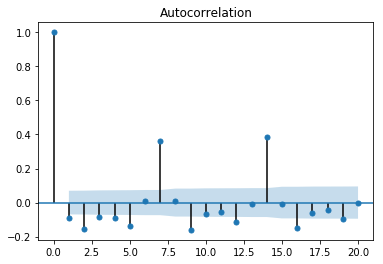

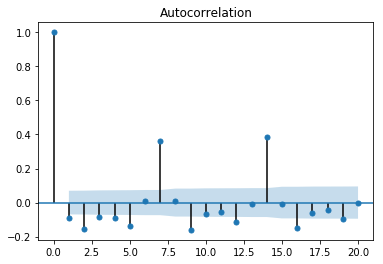

In [50]:
plot_acf(endog_diff['energy_sum'], lags=20)

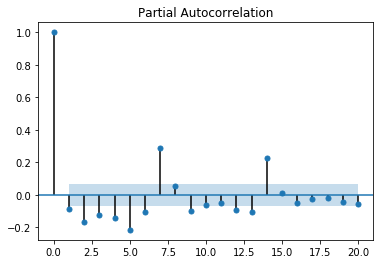

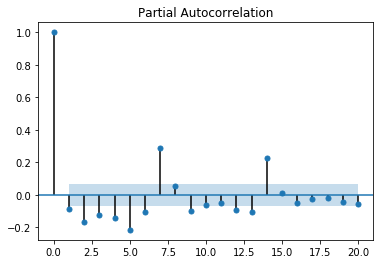

In [51]:
plot_pacf(endog_diff['energy_sum'], lags=20)

In [54]:
from statsmodels.tsa.statespace.varmax import VARMAX
model_varmax = VARMAX(endog=endog_diff, exog=exog, order=(15, 0))
results_varmax = model_varmax.fit(maxiter=5000, disp=False)
results_varmax.summary()

C:\Users\Kunal\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Kunal\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Dep. Variable:,"['energy_sum', 'energy_median']",No. Observations:,795
Model:,VARX(15),Log Likelihood,3277.142
,+ intercept,AIC,-6396.284
Date:,"Fri, 08 May 2020",BIC,-6026.695
Time:,14:45:10,HQIC,-6254.263
Sample:,0,,
,- 795,,
Covariance Type:,opg,,
Ljung-Box (Q):,"31.18, 51.77",Jarque-Bera (JB):,"30.66, 350.34"
Prob(Q):,"0.84, 0.10",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.51, 0.40",Skew:,"-0.23, -0.46"


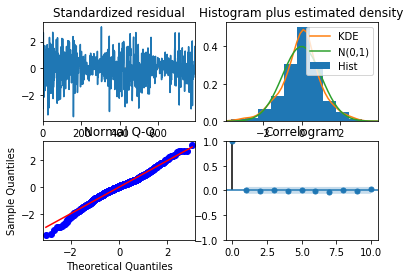

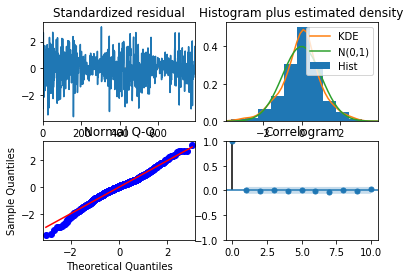

In [55]:
results_varmax.plot_diagnostics()

In [56]:
#exog_test = merged_df_varmax_test[['humidity', 'temperatureLow', 'month_1', 'month_2', 'month_3',
#                                   'month_4','month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10','month_11', 'month_12']]
#exog_test = merged_df_varmax_test[['humidity', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
#                                'holiday_0.0', 'holiday_1.0']]
#exog_test = merged_df_varmax_test[['humidity', 'temperatureLow', 'weekend_False', 'weekend_True']]
exog_test = merged_df_varmax_test[['humidity', 'temperatureLow', 'month_1', 'month_2', 'month_3', 'month_4', 'month_7']]
exog_test.head()

,humidity,temperatureLow,month_1,month_2,month_3,month_4,month_7
day,,,,,,,
2014-01-28,0.83,4.76,1,0,0,0,0
2014-01-29,0.90,3.66,1,0,0,0,0
2014-01-30,0.91,1.97,1,0,0,0,0
2014-01-31,0.91,4.83,1,0,0,0,0
2014-02-01,0.76,6.24,0,1,0,0,0


In [57]:
forecast_out = results_varmax.forecast(steps=30, exog=exog_test)

C:\Users\Kunal\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Kunal\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


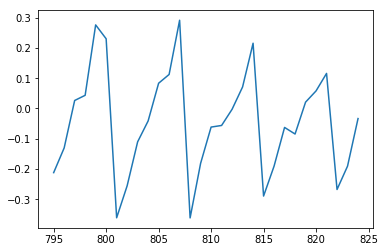

In [58]:
plt.plot(forecast_out['energy_sum'])

In [59]:
merged_df_varmax_test.head()

,energy_sum,energy_median,humidity,temperatureLow,day_0,day_1,day_2,day_3,day_4,day_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_False,holiday_True
day,,,,,,,,,,,,,,,,,,,,,
2014-01-28,11.350840,0.174510,0.83,4.76,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2014-01-29,11.818320,0.187820,0.90,3.66,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2014-01-30,11.697604,0.183157,0.91,1.97,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2014-01-31,11.871105,0.187204,0.91,4.83,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2014-02-01,11.746686,0.184630,0.76,6.24,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [101]:
#merged_df_varmax_test.set_index('day', inplace=True)

In [60]:
df_forecast = pd.DataFrame(forecast_out.values, index=merged_df_varmax_test.index[-len(merged_df_varmax_test):], columns=['energy_sum', 'energy_median'])
df_forecast

,energy_sum,energy_median
day,,
2014-01-28,-0.211912,-0.003265
2014-01-29,-0.130316,-0.001965
2014-01-30,0.026371,0.000255
2014-01-31,0.043484,0.001465
2014-02-01,0.275952,0.005769
2014-02-02,0.230149,0.001779
2014-02-03,-0.361010,-0.006011
2014-02-04,-0.255421,-0.004681
2014-02-05,-0.110211,-0.001303


In [61]:
len(df_forecast)

30

In [62]:
df_forecast.head()

,energy_sum,energy_median
day,,
2014-01-28,-0.211912,-0.003265
2014-01-29,-0.130316,-0.001965
2014-01-30,0.026371,0.000255
2014-01-31,0.043484,0.001465
2014-02-01,0.275952,0.005769


In [63]:
df_forecast_inverse = df_forecast.copy()

In [64]:
merged_df_varmax_train['energy_sum'].iloc[-1]

11.768652312425937

In [65]:
df_forecast_inverse['energy_sum'] = merged_df_varmax_train['energy_sum'].iloc[-1] + df_forecast_inverse['energy_sum'].cumsum()

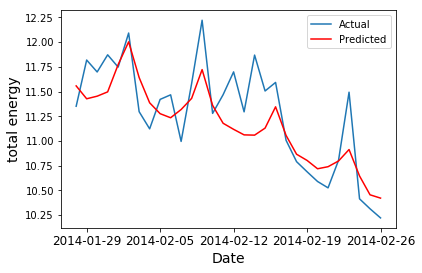

In [99]:
plt.plot(merged_df_varmax_test['energy_sum'], label='Actual')
plt.plot(df_forecast_inverse['energy_sum'], color='red', label='Predicted')
plt.xticks(size=12)
plt.ylabel('total energy', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend()

In [71]:
merged_output = df_forecast_inverse.merge(merged_df_varmax_test, how='inner', on='day')

In [76]:
merged_output = merged_output.rename({'energy_sum_x': 'Predicted', 'energy_sum_y': 'Actual'}, axis=1)
merged_output_final = merged_output[['Predicted', 'Actual']]
merged_output_final.to_csv("..\\Data\\varx_output.csv")

In [77]:
#evaluation

#MAE
mae = np.mean(np.abs(df_forecast_inverse['energy_sum'] - merged_df_varmax_test[:30]['energy_sum']))
print('MAE -', mae)

#RMSE
rmse = np.mean((df_forecast_inverse['energy_sum'] - merged_df_varmax_test[:30]['energy_sum'])**2)**0.5
print('RMSE - ', rmse)

#MAPE
mape = np.mean(np.abs(df_forecast_inverse['energy_sum'] - merged_df_varmax_test[:30]['energy_sum']) / np.abs(merged_df_varmax_test[:30]['energy_sum'])) * 100
print('MAPE - ', mape)

MAE - 0.25492831182219117
RMSE -  0.3118381293055166
MAPE -  2.232756729935444
